# Assignment 3
## Learning Outcomes
By completing this assignment, you will be able to implement and use randomization tests to determine whether a specific effect is statistically significant. Randomization tests are a highly universal and powerful way to do this, and form an essential part of the toolkit of any Data Scientist. 

## Problem Description
An increasingly common statistical tool for determining whether a difference is significant is the randomization or permutation test. A randomization test builds - rather than assumes – a sampling distribution of the test statistics. This is achieved by exchanging or permuting variables which are “exchangeable” under the Null-hypothesis. A randomization test gives a simple way to compute the sampling distribution for any test statistic under the null hypothesis that the dependent variable is statistically not dependent on the shuffled variable. 
In this assignment, we continue with the movie dataset from last week. This week your main task is to determine whether the difference in proportion for female vs. male directors to direct action movies is significant. 
You are allowed to use standard numpy and pandas functions such as mean, groupby, shuffle. But you are not allowed to use a permutation functions that have been already been designed. Numeric calculations in python that are printed should be rounded to 6 decimal places. 

Methods that you may find beneficial. 
Pandas: crosstab, iloc. Numpy: random.shuffle, reset_index, matplotlib: hist, axvline 

## Preliminaries 
Import pandas, numpy, matplotlib, and load the dataset file

In [139]:
import pandas as pd
import numpy as np

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('movieDataset.csv')

## TASK 1: Defining the test statistics (40pts)
### Question 1 - Create contingency table of adventure (yes/no) by director gender (10pts)
Generate a cross-tabulation table of the 2x2 proportions of directorGender vs. whether the movie is an adventure or not (all other genres should be combined into non-adventure movies).

In [140]:
ctable = pd.crosstab(df['genre'] == 'adventure', df['dirGender'], margins = True)
display(ctable)

dirGender,female,male,All
genre,,,
False,31,155,186
True,6,58,64
All,37,213,250


### Question 2 - Calculate p(adventure|female)-p(adventure|male) (20pts)
Calculate the probability that the movie is an adventure given that the director Gender is female, p(adventure|female), the probability of the movie is an adventure given that the director Gender is male, p(adventure|male), as well as the difference between these two numbers, p(adventure|female)- p(adventure|male).

In [141]:
pAdvFemale = ctable['female'][True] / ctable['female']['All']
pAdvMale = ctable['male'][True] / ctable['male']['All']
pAdventure = pAdvFemale - pAdvMale

print(pAdvFemale)
print(pAdvMale)
print(pAdventure)

0.16216216216216217
0.27230046948356806
-0.11013830732140589


### Question 3 - Define a function that calculates the difference in average income by gender (10pts)
Write a function (e.g., https://www.tutorialspoint.com/python/python_functions.htm) that takes the data frame as an input and returns the difference between the average income of male directors in adventure and the average income of female directors in adventure.

In [142]:
def averageInc(dataframe):
    #Calculating the mean of dirIncome for each gender in each genre
    genderInc = dataframe.groupby(['dirGender', 'genre']).agg({'dirIncome': ['mean']})
    genderInc.columns = genderInc.columns.droplevel(1) #This gets rid of the mean title in the dirIncome column
    genderInc = genderInc.reset_index()
    
    maleAdvInc = genderInc.iloc[6]['dirIncome'] #Getting the value of dirIncome for male directors in adventure
    femaleAdvInc = genderInc.iloc[1]['dirIncome'] #Getting the value of dirIncome for female directors in adventure
    diffInc = maleAdvInc - femaleAdvInc
    
    return diffInc

#diff = averageInc(df)
#print(f'Average difference director income from adventure movies: {diff}')

## Task 2: Perform a permutation test (60pts)
### Question 1 (10pts)
Written answer: We want to test the hypothesis that female directors of adventure movies earn less, on average, than male directors of adventure movies. What is the Null-hypothesis we need to consider? 

In [143]:
#The Null-hypothesis we need to consider for this situation is HIncome: averageFInc >= averageMInc
#The alternative-hypothesis would be HIncome: averageMInc < averageFInc
#Such that averageFInc is the average income of a female adventure movie director and averageMInc is the average income of a male adventure movie director

### Question 2 (40pts)
Perform a permutation test. Under the Null-hypothesis the director gender is exchangeable. Write a function that takes the data frame as an input and then randomly permutes the directorGender column. For each iteration, the function then calls the function written for Task1, Q3 to get the test statistic. Each iteration, the test statistic should  be stored in a list. It is important to mention that the gender must be randomly assigned each time prior to calculating the difference of the conditional probabilities. 

After bulding up the numpy array of test statistics, the function should plot a histogram of the test statistics and mark the value of the empirical test statistics by a vertical line (see https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html). Finally, it should report the p-value. 

For Pseudo code see lecture. Start with 500 iterations to test your code – for the final result, use 5000 iterations.

The p value is 0.0


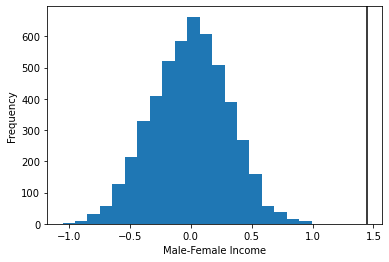

In [144]:
def permuteTest(dataframe):
    df_copy = dataframe.copy()
    statDiff1 = averageInc(df_copy)
    statDiff2 = []
    
    for i in range(0, 5000):
        shuffleVar = np.random.randint(2, size = len(df_copy.index))
        df_copy['dirGender'] = shuffleVar
        statDiff2.append(averageInc(df_copy))
    
    #Plot histogram of shuffled data array
    plt.hist(statDiff2, bins = 20)
    plt.xlabel('Male-Female Income')
    plt.ylabel('Frequency')
    plt.axvline(x = statDiff1, color = 'black')
    
    #Calculating p-value
    H0 = statDiff2 >= statDiff1
    N = sum(H0)
    p = N/len(df_copy)
    print(f'The p value is {p}')
    
permuteTest(df)

Figure 1: Permutated Histogram plot of the difference in average direction income between male and female directors

### Question 3 (10pts)
Written response: What do you conclude from this result?


In [145]:
#Given these results, we can conclude that we don't need to reject the null-hypothesis as seen with the rejection zone, most of the data is below the rejection zone.
#Also, given the p value, we can conclude that when the null-hypothesis is true, we have a 0% chance of rejecting it.  From the p-value we can further conclude that our test is statistcally significant.